In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from utils import Plot, Static

## Data Exploration

In [2]:
DIR = 'D:\\PPrograms\\Python\\Kaggle\\Predicting Loan Pay\\'
TARGET = 'loan_paid_back'

In [3]:
train = pd.read_csv(os.path.join(DIR, 'data\\train.csv'), index_col='id')
test = pd.read_csv(os.path.join(DIR, 'data\\test.csv'), index_col='id')
train.head(10)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1,1.0
6,61574.16,0.042,696,16907.71,13.52,Other,Single,High School,Self-employed,Debt consolidation,C5,1.0
7,45953.31,0.100,654,10111.62,12.82,Female,Married,High School,Employed,Home,D1,1.0
8,30592.29,0.132,713,7522.36,9.48,Male,Married,Bachelor's,Employed,Education,C5,1.0


In [11]:
cols = train.columns[1:]
print(f'shape: {train.shape}')
print(cols)

shape: (593994, 12)
Index(['debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate',
       'gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade', 'loan_paid_back'],
      dtype='object')


In [12]:
# NaN values
train.isnull().sum()

annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [4]:
# Split categorical features and numerical features
NUM = [col for col in test.columns if train[col].dtypes in ('float64', 'int64')]
CAT = [col for col in test.columns if train[col].dtypes in ('object',)]
COL = NUM + CAT
print(f'cate_cols: {CAT}\nnum_cols: {NUM}')

cate_cols: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
num_cols: ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']


## Categorical Feature

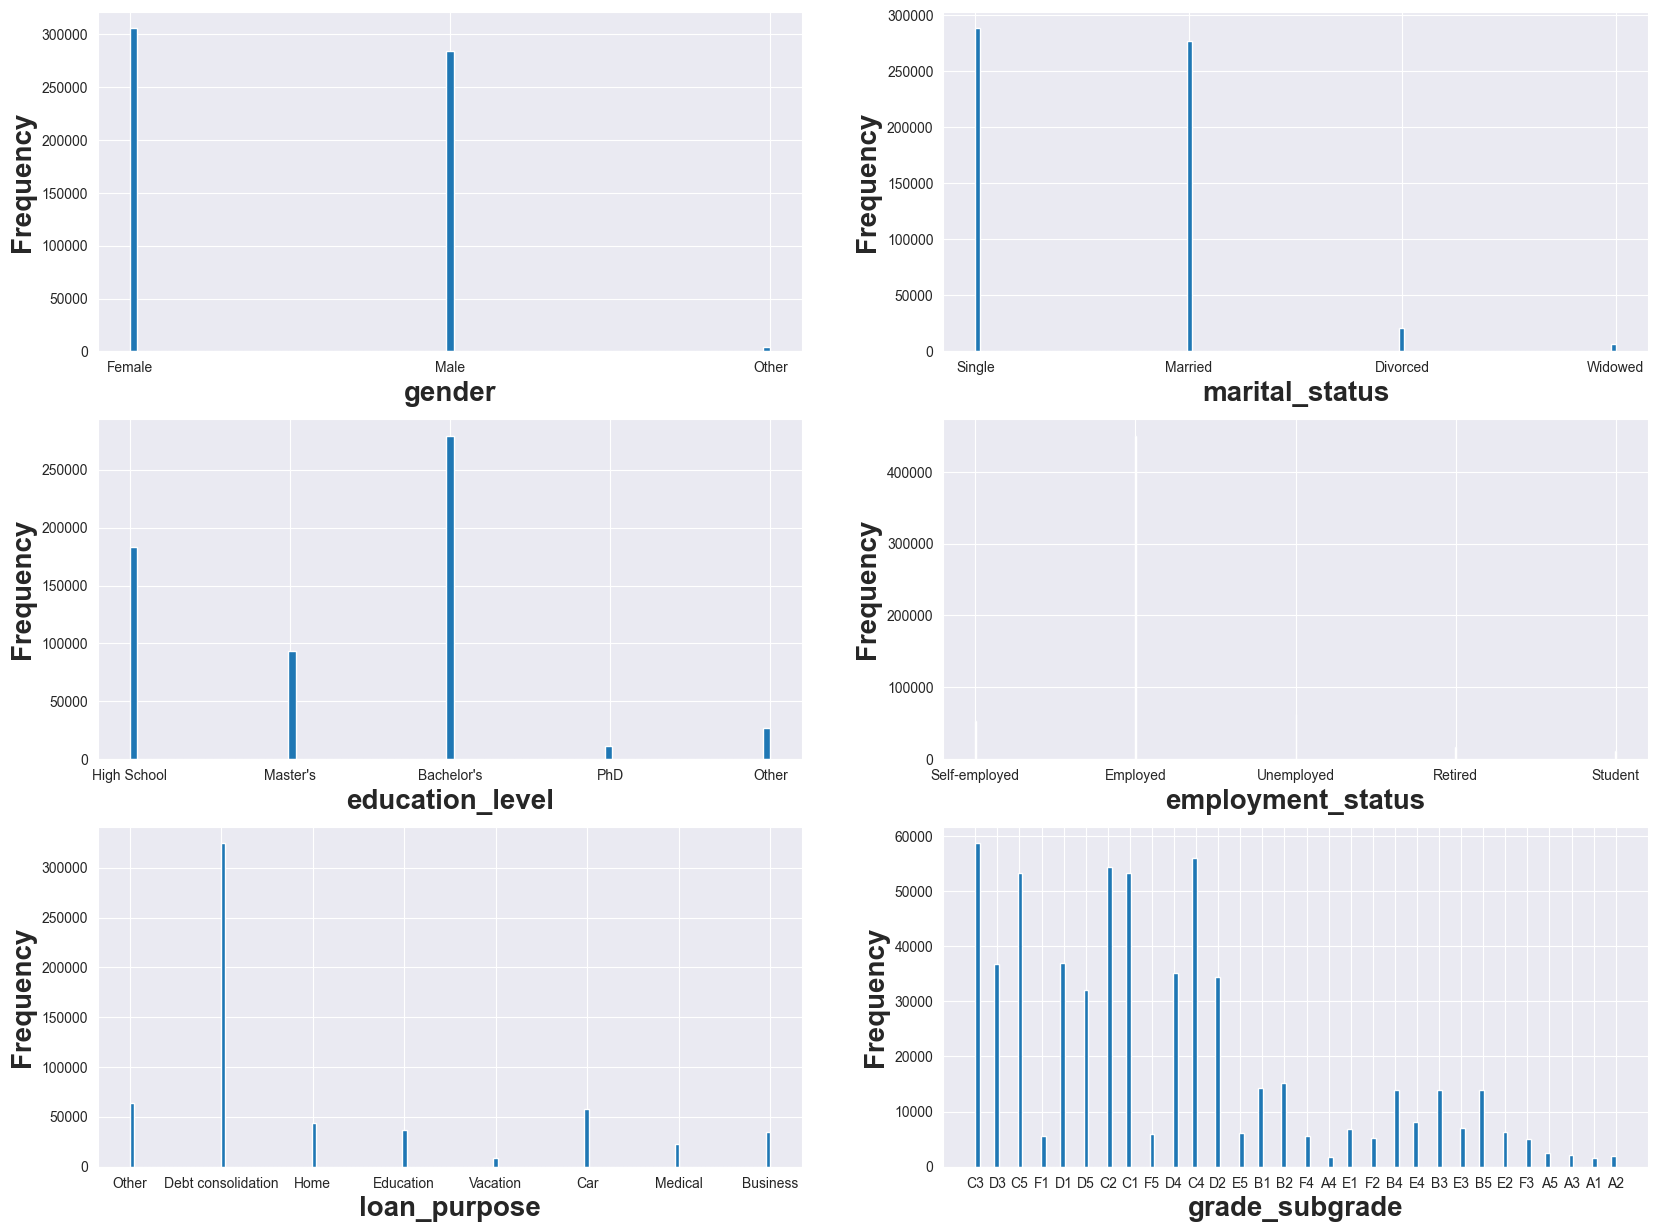

In [15]:
# Categorical features: hist
fig, axes = plt.subplots(round(len(CAT)/2), 2, figsize=(20, 15))
for i, col in enumerate(CAT):
    r,c = divmod(i,2)
    ax = axes[r,c]
    Plot.hist(train[col], ax, col)

In [18]:
# Determine which categorical features distinguish the label best
distinguish_tank = []
for col in CAT:
    grouped = train.groupby(col).apply(lambda x : np.sum(x[TARGET])/x.shape[0], include_groups=False)
    var = grouped.var()
    distinguish_tank.append((col, var))
    print(f'{grouped}\n')
distinguish_tank.sort(key=lambda x : x[1], reverse=True)
print(f'rank of distinguish factor: {distinguish_tank}')

gender
Female    0.801708
Male      0.795752
Other     0.795333
dtype: float64

marital_status
Divorced    0.796640
Married     0.799144
Single      0.798873
Widowed     0.789848
dtype: float64

education_level
Bachelor's     0.788892
High School    0.809698
Master's       0.802346
Other          0.802789
PhD            0.830067
dtype: float64

employment_status
Employed         0.894145
Retired          0.997204
Self-employed    0.898457
Student          0.263515
Unemployed       0.077619
dtype: float64

loan_purpose
Business              0.813104
Car                   0.800630
Debt consolidation    0.796911
Education             0.777053
Home                  0.823224
Medical               0.778085
Other                 0.802377
Vacation              0.796071
dtype: float64

grade_subgrade
A1    0.952500
A2    0.952924
A3    0.955470
A4    0.957084
A5    0.944962
B1    0.916341
B2    0.937430
B3    0.940040
B4    0.931758
B5    0.934204
C1    0.860090
C2    0.851165
C3    0.836000
C4

## Numerical Feature

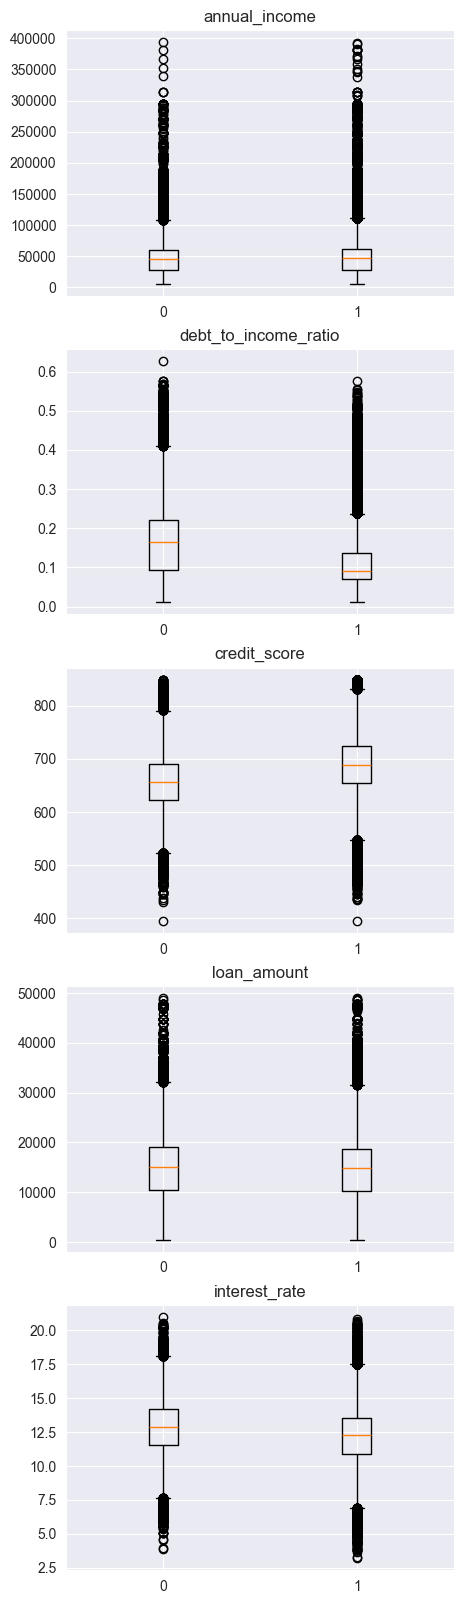

In [20]:
# Numerical features: box
fig, axes = plt.subplots(len(NUM), 1, figsize=(5, 20))
for i, col in enumerate(NUM):
    ax = axes[i]
    label0 = train[train[TARGET] == 0][col]
    label1 = train[train[TARGET] == 1][col]
    Plot.boxplot([label0,label1], ax, labels=[0,1], title=col)

In [21]:
# Determine which numerical features distinguish the label best
for col in NUM:
    # Two samples T-test
    p_value = Static.Ttest(train[train[TARGET] == 0][col], train[train[TARGET] == 1][col])
    # Point biserial correlation test
    if p_value < 0.05:
        corr = Static.PBCtest(train[col], train[TARGET])
    else:
        corr = -1
    print(f'The distinguishing ability of {col}:\np_value: {round(p_value,2)}; correlation: {round(corr,4)}\n')

The distinguishing ability of annual_income:
p_value: 0.0; correlation: 0.0063

The distinguishing ability of debt_to_income_ratio:
p_value: 0.0; correlation: -0.3357

The distinguishing ability of credit_score:
p_value: 0.0; correlation: 0.2346

The distinguishing ability of loan_amount:
p_value: 0.0; correlation: -0.0038

The distinguishing ability of interest_rate:
p_value: 0.0; correlation: -0.1312



<Axes: >

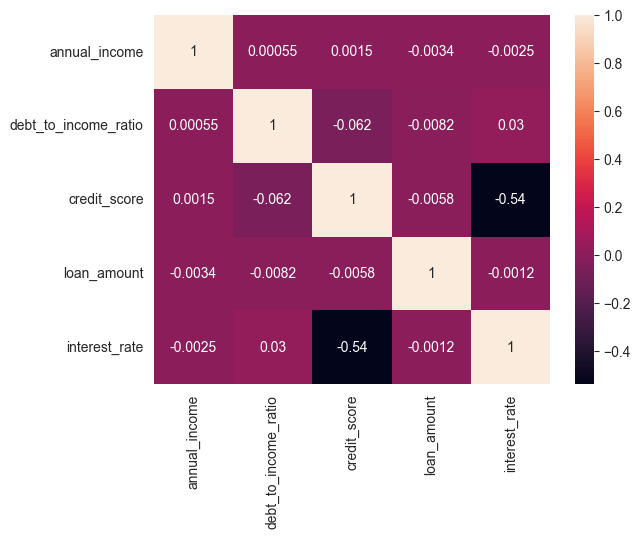

In [22]:
# The correlation between numerical features
corr = train[NUM].corr()
sns.heatmap(corr, annot=True)

Best number of bins: 4.


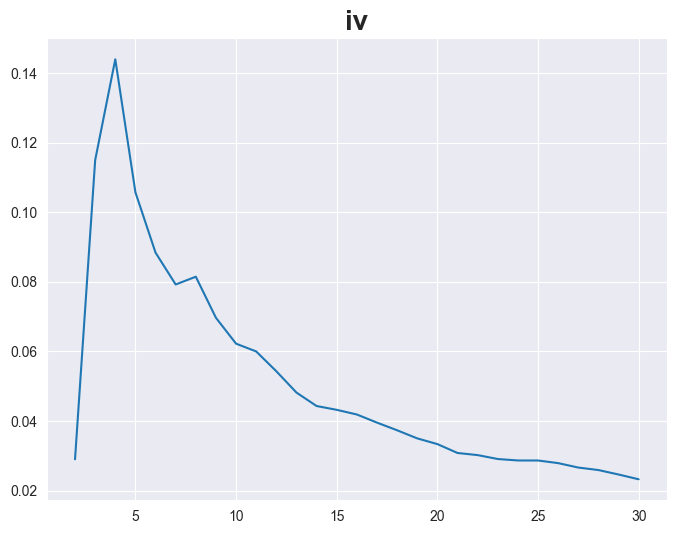

In [8]:
# Discrete continuous features
col_name = 'debt_to_income_ratio'
bins = range(2,31)

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

cramer_tank = []
for bin in bins:
    labels = [f'{col_name}_{i}' for i in range(bin)]
    discre_data = pd.cut(train[col_name], bins=bin, labels=labels)
    iv = Static.IV(discre_data.values, train[TARGET].values)
    cramer_tank.append(iv)
print(f'Best number of bins: {bins[np.argmax(cramer_tank)]}.')
Plot.lineplot(bins, cramer_tank, axes, title='iv')

In [10]:
def search_best_bins(col_name):
    bins = range(2,31)
    cramer_tank = []
    for bin in bins:
        labels = [f'{col_name}_{i}' for i in range(bin)]
        discre_data = pd.cut(train[col_name], bins=bin, labels=labels)
        iv = Static.IV(discre_data.values, train[TARGET].values)
        cramer_tank.append(iv)
    return bins[np.argmax(cramer_tank)]

for col in NUM:
    print(f'Best number of bins for {col}: {search_best_bins(col)}.')

Best number of bins for annual_income: 7.
Best number of bins for debt_to_income_ratio: 4.
Best number of bins for credit_score: 3.
Best number of bins for loan_amount: 14.
Best number of bins for interest_rate: 2.
